# Project Title: Location-Based Flats Data Analysis in Pune

# Project Overiew: 

The "Location-Based Flat Rate Data Analysis in Pune" project aims to analyze and provide insights into the flat rate pricing trends in different areas of Pune, India. The project will gather data from various sources, including real estate websites, government databases, and surveys, to determine the average flat rates in different neighborhoods of Pune. This analysis will be beneficial for both potential homebuyers and real estate investors, helping them make informed decisions based on location-specific pricing information.

# Importing Necessary Libraries

In [1]:
# Import libraries for web scraping
import requests                         # For making HTTP requests to websites
from bs4 import BeautifulSoup           # For parsing HTML content
import pandas as pd                     # For data manipulation and storage
import numpy as np                      # For numerical operations (optional)
import re                               # For regular expressions (if needed for data extraction)
import time                             # For adding delays (to avoid overloading websites)
from tqdm import tqdm                   # For progress bars (optional but helpful)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Web Scraping : Makaan

In [2]:
url = 'https://www.makaan.com/pune-residential-property/buy-property-in-pune-city'

In [3]:
# Send an HTTP GET request to the URL
response = requests.get(url)
response

<Response [200]>

In [4]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # For instance, let's find and print the title of the webpage:
    page_title = soup.title.string
    print("Page Title:", page_title)
    
else:
    print('Failed to retrieve the webpage. Status code:', response.status_code)

Page Title: Property for Sale in Pune | 58872+ Pune Properties for sale


In [5]:
# Find and extract property listings on the webpage
property_listings = soup.find_all('div', class_='cardWrapper')

In [6]:
property_listings

[<div class="cardWrapper" data-listing-id="21447445" data-listing-projectid="3203756" data-module="listing" data-track-scroll="1"><script type="text/x-config">{"selector":"listing_21447445","sellerType":"BUILDER","builderId":104859,"builderName":"Kohinoor Group Construction And Real Estate","companyType":"BUILDER","companyId":100086040,"companyUserId":100936595,"backgroundColor":"#edd7d7","textColor":"#fff","nameText":"K","companyName":"Kohinoor Group","companyRating":0,"verificationDate":1693420200000,"serverTime":1693933992282,"listingUrl":"https://www.makaan.com/pune/kohinoor-group-construction-and-real-estate-kaleido-in-kharadi-21447445/2bhk-696-sqft-apartment","imageUrl":"https://static.makaan.com/1/3203756/291/kaleido-others-150914325.jpeg?width=460&amp;height=260","id":21447445,"propertyId":15996666,"projectId":3203756,"projectName":"Kaleido","projectStatus":"Under Construction","mainImageId":"","imageCount":26,"latitude":18.56085587,"longitude":73.94391632,"localityName":"Khara

In [7]:
total_pages_to_scrape = 400

In [8]:
# Create lists to store data
Name_of_Property= []
Type_of_House =[]
BHK_type = []
City = []
Location = []
price_of_Property= []
price_per_sq_ft = []
Area_in_sqft = []
construction_Status = []
Possession_By = []

for i in range(1,100):
    url = 'https://www.makaan.com/pune-residential-property/buy-property-in-pune-city'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    container=soup.find_all("li",class_="cardholder")
    
    for i in container:
        a=i.find('a',class_="projName")
        if a:
            Name_of_Property.append(a.text)
        else:
            Name_of_Property.append(np.nan)
            
    for i in container:
        b=i.find('div',class_="title-line-wrap")
        reg=re.findall("((?:Apartment|Villa|Independent|Flat))",i.text)
        if reg:
            Type_of_House.append(reg[0])
        else:
            Type_of_House.append(np.nan)
            
    for i in container:
        i.find("div",class_="title-line-wrap")
        reg=re.findall("(\d\sBHK)",i.text)
        if reg:
            BHK_type.append(reg[0])
        else:
            BHK_type.append(np.nan)
            
    for i in container:
        i.find("span",class_="cityName")
        reg = re.findall(('Pune'),i.text)
        if reg:
            City.append(reg[0])
        else:
            City.append(np.nan)
            
            
    for i in container:
        a = i.find("a", class_="loclink")
        if a:
            location_text = a.text
            location_parts = location_text.split(', Pune')
            if len(location_parts) > 0:
                location_name = location_parts[0].strip()  # Get the first part, which is the location
                Location.append(location_name)
            else:
                Location.append(np.nan)
        else:
            Location.append(np.nan)
            
    for i in container:
        a = i.find("td",class_="price")
        if a:
            price_of_Property.append(a.text)
        else:
            price_of_Property.append(np.nan)
            
    for i in container:
        a = i.find("td", class_="lbl rate")
        if a:
            price_text = a.text
            # Extract only the numeric part using regex
            price_per_sq_ft_value = re.search(r'(\d+,\d+)', price_text)
            if price_per_sq_ft_value:
                price_per_sq_ft.append(price_per_sq_ft_value.group())
            else:
                price_per_sq_ft.append(np.nan)
        else:
            price_per_sq_ft.append(np.nan)
            
    for i in container:
        a = i.find("td",class_="size")
        if a:
            Area_in_sqft.append(a.text)
        else:
            Area_in_sqft.append(np.nan)
            
    for i in container:
        a = i.find("td",class_="val")
        if a:
            construction_Status.append(a.text)
        else:
            construction_Status.append(np.nan)

    for i in container:
        a = i.find("li", class_="keypoint")
        if a:
            possession_text = a.text
            # Extract possession date in the format "Dec 2027" using regex
            possession_date = re.search(r'(?:Possession by\s)?(\w+\s\d{4})', possession_text)
            if possession_date:
                Possession_By.append(possession_date.group(1))
            else:
                Possession_By.append(np.nan)
        else:
            Possession_By.append(np.nan)

In [9]:
# Lengths for each variable

In [10]:
print(len(Name_of_Property))
print(len(Type_of_House))
print(len(BHK_type))
print(len(City))
print(len(Location))
print(len(price_of_Property))
print(len(price_per_sq_ft))
print(len(Area_in_sqft))
print(len(construction_Status))
print(len(Possession_By))

1980
1980
1980
1980
1980
1980
1980
1980
1980
1980


# Create a DataFrame from the scraped data

In [11]:
Property_Data = {"Name of Property":Name_of_Property,
                 "Type of house":Type_of_House,
                 "Type of Property":BHK_type,
                 "City": City,
                 "Location":Location,
                 "Price":price_of_Property,
                 "Price /Sq.ft":price_per_sq_ft,
                 "Area in Sq.ft":Area_in_sqft,
                 "Construction Status":construction_Status,
                 "Possession By":Possession_By
                }

In [12]:
df = pd.DataFrame(data=Property_Data)

In [13]:
df

,Name of Property,Type of house,Type of Property,City,Location,Price,Price /Sq.ft,Area in Sq.ft,Construction Status,Possession By
0,Kohinoor Kaleido,Apartment,2 BHK,Pune,Kharadi,73.99 L,"10,632",696,Under Construction,Dec 2027
1,Ram Green Hive A C D E,Apartment,1 BHK,Pune,Fursungi,35.75 L,"6,809",525,Ready to move,NaN
2,Lotus Urban Homes,Apartment,2 BHK,Pune,Charholi Budruk,39.99 L,"5,821",687,Under Construction,Dec 2025
3,Shree Samarth Shri ICON,Apartment,2 BHK,Pune,Moshi,39.56 L,"5,896",671,Under Construction,Dec 2024
4,Shree Sonigara VIVANTA NEXT,Apartment,2 BHK,Pune,Tathawade,59 L,"8,392",703,Under Construction,Feb 2026
...,...,...,...,...,...,...,...,...,...,...
1975,Nirman Aura,Apartment,1 BHK,Pune,Ambegaon Budruk,47.5 L,"9,500",500,Ready to move,NaN
1976,Manav Midtown One,Apartment,2 BHK,Pune,Rasta Peth,73.62 L,"11,224",656,Under Construction,Dec 2026
1977,Saikrushna Midori Tower,Apartment,2 BHK,Pune,Mamurdi,67.5 L,"7,401",912,Under Construction,Dec 2024
1978,Nyati Emerald,Apartment,3 BHK,Pune,Baner,1.5 Cr,"12,366",1213,Under Construction,Nov 2026


# Export the Dataframe into CSV or EXCEL file

In [14]:
df.to_csv('Flats Data.csv',index=None)

# Data Preprocessing

In [15]:
df.head(20)

,Name of Property,Type of house,Type of Property,City,Location,Price,Price /Sq.ft,Area in Sq.ft,Construction Status,Possession By
0,Kohinoor Kaleido,Apartment,2 BHK,Pune,Kharadi,73.99 L,"10,632",696,Under Construction,Dec 2027
1,Ram Green Hive A C D E,Apartment,1 BHK,Pune,Fursungi,35.75 L,"6,809",525,Ready to move,NaN
2,Lotus Urban Homes,Apartment,2 BHK,Pune,Charholi Budruk,39.99 L,"5,821",687,Under Construction,Dec 2025
3,Shree Samarth Shri ICON,Apartment,2 BHK,Pune,Moshi,39.56 L,"5,896",671,Under Construction,Dec 2024
4,Shree Sonigara VIVANTA NEXT,Apartment,2 BHK,Pune,Tathawade,59 L,"8,392",703,Under Construction,Feb 2026
5,Sapphire Vrinda,Apartment,2 BHK,Pune,Charholi Budruk,35.84 L,"6,255",573,Under Construction,Mar 2027
6,Shevi Utopia Gold,Apartment,2 BHK,Pune,Moshi,55.9 L,"8,185",683,Under Construction,Dec 2025
7,Parklane Urbanjoy Wing B,Apartment,2 BHK,Pune,Sus,58.5 L,"8,013",730,Under Construction,Nov 2027
8,Yashada Supreme,Apartment,1 BHK,Pune,Moshi,24.64 L,"6,383",386,Under Construction,Nov 2024
9,Namrata Prime Land,Apartment,2 BHK,Pune,Talegaon Dabhade,46.93 L,"6,812",689,Under Construction,Aug 2023


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of Property     1980 non-null   object
 1   Type of house        1980 non-null   object
 2   Type of Property     1980 non-null   object
 3   City                 1980 non-null   object
 4   Location             1980 non-null   object
 5   Price                1980 non-null   object
 6   Price /Sq.ft         1980 non-null   object
 7   Area in Sq.ft        1980 non-null   object
 8   Construction Status  1980 non-null   object
 9   Possession By        1782 non-null   object
dtypes: object(10)
memory usage: 154.8+ KB


In [17]:
df.describe()

,Name of Property,Type of house,Type of Property,City,Location,Price,Price /Sq.ft,Area in Sq.ft,Construction Status,Possession By
count,1980,1980,1980,1980,1980,1980,1980,1980,1980,1782
unique,20,1,3,1,15,20,20,20,2,14
top,Kohinoor Kaleido,Apartment,2 BHK,Pune,Moshi,73.99 L,"10,632",696,Under Construction,Dec 2025
freq,99,1980,1188,1980,297,99,99,99,1782,198


In [18]:
df.shape

(1980, 10)

In [19]:
df.size

19800

In [20]:
df.columns

Index(['Name of Property', 'Type of house', 'Type of Property', 'City',
       'Location', 'Price', 'Price /Sq.ft', 'Area in Sq.ft',
       'Construction Status', 'Possession By'],
      dtype='object')

In [21]:
df.dtypes

Name of Property       object
Type of house          object
Type of Property       object
City                   object
Location               object
Price                  object
Price /Sq.ft           object
Area in Sq.ft          object
Construction Status    object
Possession By          object
dtype: object

In [22]:
df.isna().sum()

Name of Property         0
Type of house            0
Type of Property         0
City                     0
Location                 0
Price                    0
Price /Sq.ft             0
Area in Sq.ft            0
Construction Status      0
Possession By          198
dtype: int64

In [23]:
import pandas as pd
# Replace NaN values with the mode
mode_value = df['Possession By'].mode()[0]  # Calculate the mode
df['Possession By'].fillna(mode_value, inplace=True)  # Replace NaN with the mode

In [24]:
df.duplicated().sum()

1960

In [25]:
df = df.drop_duplicates()

In [26]:
df['Name of Property'].unique()

array(['Kohinoor Kaleido', 'Ram Green Hive A C D E', 'Lotus Urban Homes',
       'Shree Samarth Shri ICON', 'Shree Sonigara VIVANTA NEXT',
       'Sapphire Vrinda', 'Shevi Utopia Gold', 'Parklane Urbanjoy Wing B',
       'Yashada Supreme', 'Namrata Prime Land',
       'Aum Sanskruti Aum Sanskruti Housing Casa Imperia Ph 2',
       'Spectrum Vertillas', 'Pawar Riseonic',
       'Naiknavare Pride Avonvista Project 4',
       'Real Dream Homes Wing A B C And D', 'Nirman Aura',
       'Manav Midtown One', 'Saikrushna Midori Tower', 'Nyati Emerald',
       'Kalpataru Jade Residences'], dtype=object)

In [27]:
df['Type of Property'].unique()

array(['2 BHK', '1 BHK', '3 BHK'], dtype=object)

In [28]:
df['Type of house'].unique()

array(['Apartment'], dtype=object)

In [29]:
df['Location'].unique()

array(['Kharadi', 'Fursungi', 'Charholi Budruk', 'Moshi', 'Tathawade',
       'Sus', 'Talegaon Dabhade', 'Wakad', 'Kirkatwadi', 'Mahalunge',
       'Varale', 'Ambegaon Budruk', 'Rasta Peth', 'Mamurdi', 'Baner'],
      dtype=object)

In [30]:
df.head(5)

,Name of Property,Type of house,Type of Property,City,Location,Price,Price /Sq.ft,Area in Sq.ft,Construction Status,Possession By
0,Kohinoor Kaleido,Apartment,2 BHK,Pune,Kharadi,73.99 L,"10,632",696,Under Construction,Dec 2027
1,Ram Green Hive A C D E,Apartment,1 BHK,Pune,Fursungi,35.75 L,"6,809",525,Ready to move,Dec 2024
2,Lotus Urban Homes,Apartment,2 BHK,Pune,Charholi Budruk,39.99 L,"5,821",687,Under Construction,Dec 2025
3,Shree Samarth Shri ICON,Apartment,2 BHK,Pune,Moshi,39.56 L,"5,896",671,Under Construction,Dec 2024
4,Shree Sonigara VIVANTA NEXT,Apartment,2 BHK,Pune,Tathawade,59 L,"8,392",703,Under Construction,Feb 2026


In [31]:
df['Type of Property'].unique()

array(['2 BHK', '1 BHK', '3 BHK'], dtype=object)

In [32]:
df['Construction Status'].unique()

array(['Under Construction', 'Ready to move'], dtype=object)

In [33]:
df['Possession By'].unique()

array(['Dec 2027', 'Dec 2024', 'Dec 2025', 'Feb 2026', 'Mar 2027',
       'Nov 2027', 'Nov 2024', 'Aug 2023', 'May 2024', 'Oct 2024',
       'Feb 2025', 'Jun 2026', 'Dec 2026', 'Nov 2026'], dtype=object)

In [34]:
# Assuming 'df' is your DataFrame
df = df.rename(columns={'Type of Property': 'BHK Type', "Price":"Price in Lakhs"})

In [35]:
df.head(3)

,Name of Property,Type of house,BHK Type,City,Location,Price in Lakhs,Price /Sq.ft,Area in Sq.ft,Construction Status,Possession By
0,Kohinoor Kaleido,Apartment,2 BHK,Pune,Kharadi,73.99 L,"10,632",696,Under Construction,Dec 2027
1,Ram Green Hive A C D E,Apartment,1 BHK,Pune,Fursungi,35.75 L,"6,809",525,Ready to move,Dec 2024
2,Lotus Urban Homes,Apartment,2 BHK,Pune,Charholi Budruk,39.99 L,"5,821",687,Under Construction,Dec 2025


In [36]:
# Assuming 'df' is your DataFrame
df['BHK Type'] = df['BHK Type'].str.replace(' BHK', '')
# Check the updated 'BHK Type' column
df.head(2)

,Name of Property,Type of house,BHK Type,City,Location,Price in Lakhs,Price /Sq.ft,Area in Sq.ft,Construction Status,Possession By
0,Kohinoor Kaleido,Apartment,2,Pune,Kharadi,73.99 L,"10,632",696,Under Construction,Dec 2027
1,Ram Green Hive A C D E,Apartment,1,Pune,Fursungi,35.75 L,"6,809",525,Ready to move,Dec 2024


In [37]:
def convert_price(price_str):
    # Split the string by space and get the numeric part
    parts = price_str.split()
    numeric_part = parts[0]
    
    # Convert the numeric part to a float
    numeric_value = float(numeric_part)
    
    # Determine the unit and convert to Lakhs
    if 'L' in price_str:
        return numeric_value
    elif 'Cr' in price_str:
        return numeric_value * 100  # Convert Crores to Lakhs
    else:
        return numeric_value  # Default to Lakhs

# Apply the custom conversion function to the 'Price in Lakhs' column
df['Price in Lakhs'] = df['Price in Lakhs'].astype(str).map(convert_price)

In [38]:
# Convert 'Price /Sq.ft' and 'Area in Sq.ft' to float, removing commas
df['Price /Sq.ft'] = df['Price /Sq.ft'].str.replace(',', '').astype(float)
df['Area in Sq.ft'] = df['Area in Sq.ft'].str.replace(',', '').astype(float)

In [39]:
# Assuming 'Possession By' is in the format 'Month Year', e.g., 'Dec 2027'
df['Possession By'] = pd.to_datetime(df['Possession By'], format='%b %Y')
# Verify the data type has been changed
print(df['Possession By'].dtype)

datetime64[ns]


In [40]:
df['BHK Type'] = df['BHK Type'].astype(int)

In [41]:
df.dtypes

Name of Property               object
Type of house                  object
BHK Type                        int32
City                           object
Location                       object
Price in Lakhs                float64
Price /Sq.ft                  float64
Area in Sq.ft                 float64
Construction Status            object
Possession By          datetime64[ns]
dtype: object

In [42]:
df.head(10)

,Name of Property,Type of house,BHK Type,City,Location,Price in Lakhs,Price /Sq.ft,Area in Sq.ft,Construction Status,Possession By
0,Kohinoor Kaleido,Apartment,2,Pune,Kharadi,73.99,10632.0,696.0,Under Construction,2027-12-01
1,Ram Green Hive A C D E,Apartment,1,Pune,Fursungi,35.75,6809.0,525.0,Ready to move,2024-12-01
2,Lotus Urban Homes,Apartment,2,Pune,Charholi Budruk,39.99,5821.0,687.0,Under Construction,2025-12-01
3,Shree Samarth Shri ICON,Apartment,2,Pune,Moshi,39.56,5896.0,671.0,Under Construction,2024-12-01
4,Shree Sonigara VIVANTA NEXT,Apartment,2,Pune,Tathawade,59.00,8392.0,703.0,Under Construction,2026-02-01
5,Sapphire Vrinda,Apartment,2,Pune,Charholi Budruk,35.84,6255.0,573.0,Under Construction,2027-03-01
6,Shevi Utopia Gold,Apartment,2,Pune,Moshi,55.90,8185.0,683.0,Under Construction,2025-12-01
7,Parklane Urbanjoy Wing B,Apartment,2,Pune,Sus,58.50,8013.0,730.0,Under Construction,2027-11-01
8,Yashada Supreme,Apartment,1,Pune,Moshi,24.64,6383.0,386.0,Under Construction,2024-11-01
9,Namrata Prime Land,Apartment,2,Pune,Talegaon Dabhade,46.93,6812.0,689.0,Under Construction,2023-08-01


In [43]:
# Calculate mean
mean_price = df['Price in Lakhs'].mean()
# Calculate median
median_price = df['Price in Lakhs'].median()
# Calculate mode (if it exists, can be multiple modes)
mode_price = df['Price in Lakhs'].mode()
# Calculate standard deviation
std_deviation_price = df['Price in Lakhs'].std()
# Calculate percentiles (e.g., 25th, 50th, and 75th percentiles)
percentiles = df['Price in Lakhs'].quantile([0.25, 0.50, 0.75])
print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")
print(f"Standard Deviation: {std_deviation_price}")
print(f"25th Percentile: {percentiles[0.25]}")
print(f"50th Percentile (Median): {percentiles[0.50]}")
print(f"75th Percentile: {percentiles[0.75]}")

Mean: 78.96549999999999
Median: 58.75
Mode: 0      24.64
1      25.60
2      35.75
3      35.84
4      39.56
5      39.99
6      46.93
7      47.50
8      55.90
9      58.50
10     59.00
11     67.50
12     73.62
13     73.99
14     89.99
15    100.00
16    108.00
17    150.00
18    197.00
19    250.00
Name: Price in Lakhs, dtype: float64
Standard Deviation: 58.84272395882721
25th Percentile: 39.8825
50th Percentile (Median): 58.75
75th Percentile: 92.49249999999999


In [44]:
# Calculate mean
mean_area = df['Area in Sq.ft'].mean()
# Calculate median
median_area = df['Area in Sq.ft'].median()
# Calculate mode (if it exists, can be multiple modes)
mode_area = df['Area in Sq.ft'].mode()
# Calculate standard deviation
std_deviation_area = df['Area in Sq.ft'].std()
# Calculate percentiles (e.g., 25th, 50th, and 75th percentiles)
percentiles = df['Area in Sq.ft'].quantile([0.25, 0.50, 0.75])
print(f"Mean Area in sq.ft: {mean_area}")
print(f"Median Area in sq.ft: {median_area}")
print(f"Mode Area in sq.ft: {mode_area}")
print(f"Standard Deviation Area in sq.ft: {std_deviation_area}")
print(f"25th Percentile Area in sq.ft: {percentiles[0.25]}")
print(f"50th Percentile (Median) Area in sq.ft: {percentiles[0.50]}")
print(f"75th Percentile Area in sq.ft: {percentiles[0.75]}")

Mean Area in sq.ft: 795.25
Median Area in sq.ft: 692.5
Mode Area in sq.ft: 0      386.0
1      445.0
2      500.0
3      525.0
4      573.0
5      656.0
6      671.0
7      683.0
8      687.0
9      689.0
10     696.0
11     703.0
12     730.0
13     774.0
14     787.0
15     912.0
16    1000.0
17    1213.0
18    1557.0
19    1718.0
Name: Area in Sq.ft, dtype: float64
Standard Deviation Area in sq.ft: 344.5161175665921
25th Percentile Area in sq.ft: 635.25
50th Percentile (Median) Area in sq.ft: 692.5
75th Percentile Area in sq.ft: 818.25


In [45]:
# Create a frequency table for the 'Location' column
location_frequency = df['Location'].value_counts().reset_index()
location_frequency.columns = ['Location', 'Frequency']
# Display the frequency table
print(location_frequency)

            Location  Frequency
0              Moshi          3
1            Kharadi          2
2    Charholi Budruk          2
3              Baner          2
4           Fursungi          1
5          Tathawade          1
6                Sus          1
7   Talegaon Dabhade          1
8              Wakad          1
9         Kirkatwadi          1
10         Mahalunge          1
11            Varale          1
12   Ambegaon Budruk          1
13        Rasta Peth          1
14           Mamurdi          1


# Data Visualization and EDA


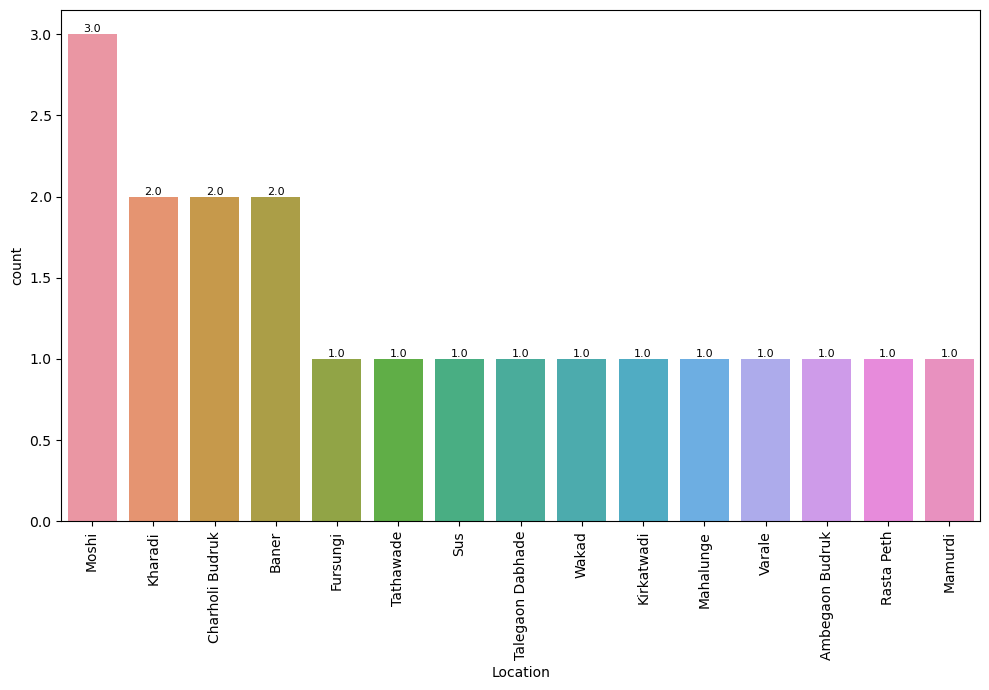

In [46]:
plt.figure(figsize=(10,7))
a=sns.countplot(x='Location',data=df ,order=df['Location'].value_counts().index)
plt.xticks(rotation=90)
for p in a.patches:
 a.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
 ha='center', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.show()

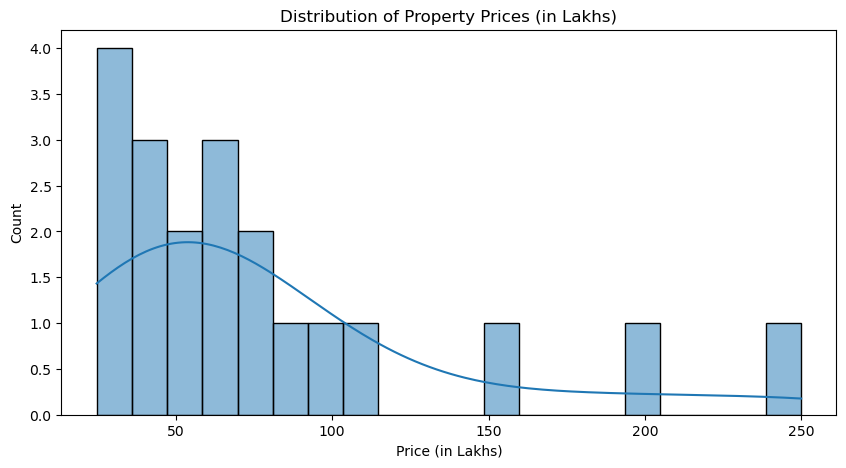

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price in Lakhs'], bins=20, kde=True)
plt.title('Distribution of Property Prices (in Lakhs)')
plt.xlabel('Price (in Lakhs)')
plt.show()

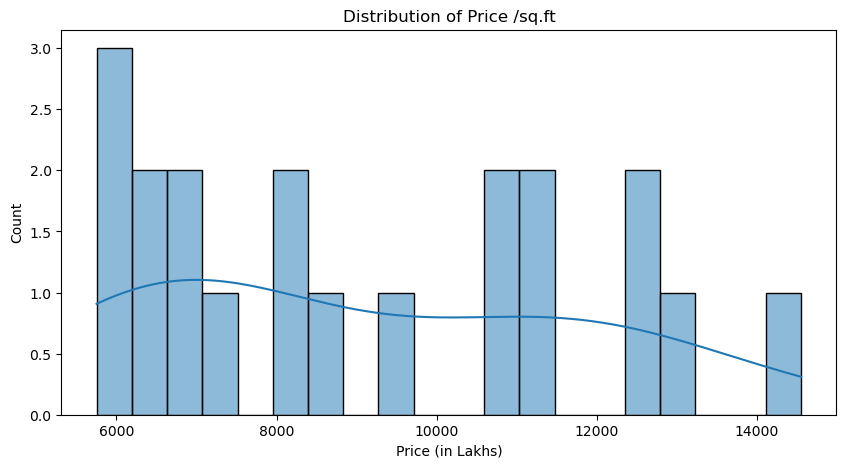

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price /Sq.ft'], bins=20, kde=True)
plt.title('Distribution of Price /sq.ft')
plt.xlabel('Price (in Lakhs)')
plt.show()

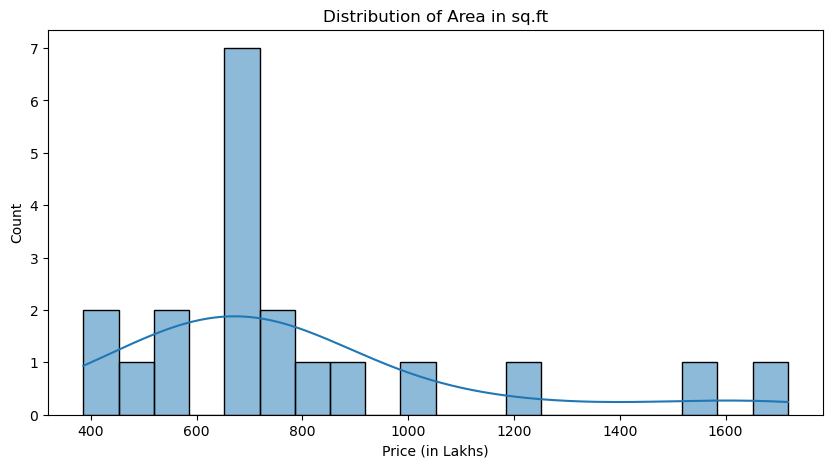

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(df['Area in Sq.ft'], bins=20, kde=True)
plt.title('Distribution of Area in sq.ft')
plt.xlabel('Price (in Lakhs)')
plt.show()

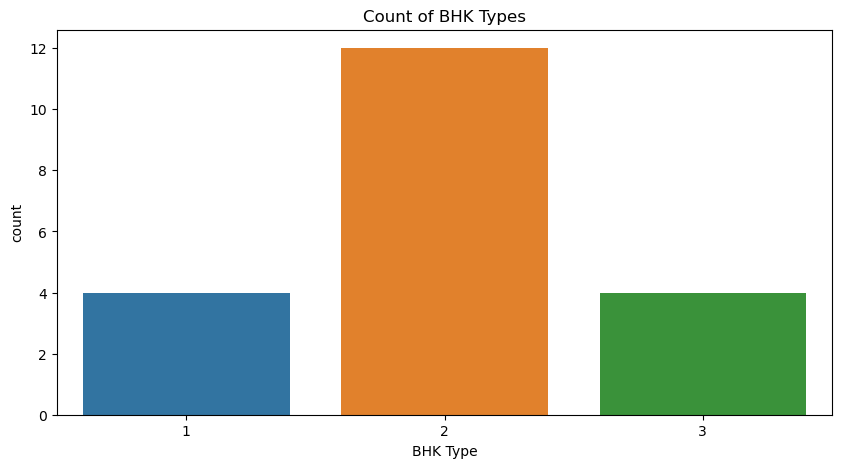

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='BHK Type')
plt.title('Count of BHK Types')
plt.xticks(rotation=0)
plt.show()

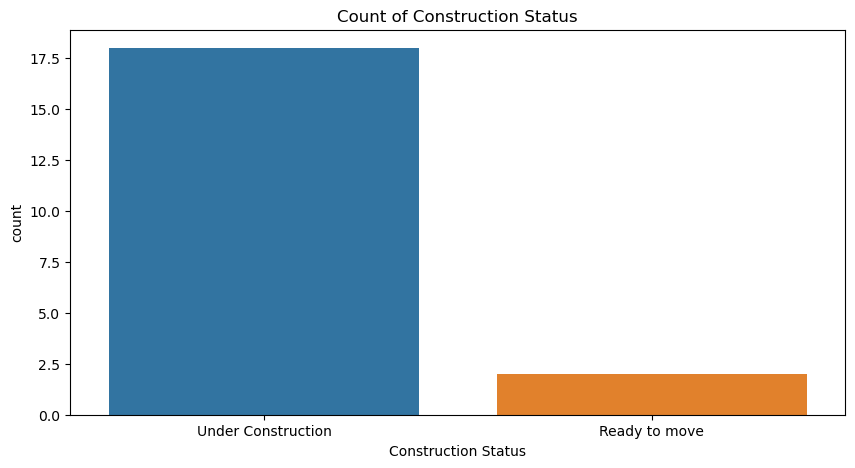

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Construction Status')
plt.title('Count of Construction Status')
plt.xticks(rotation=0)
plt.show()

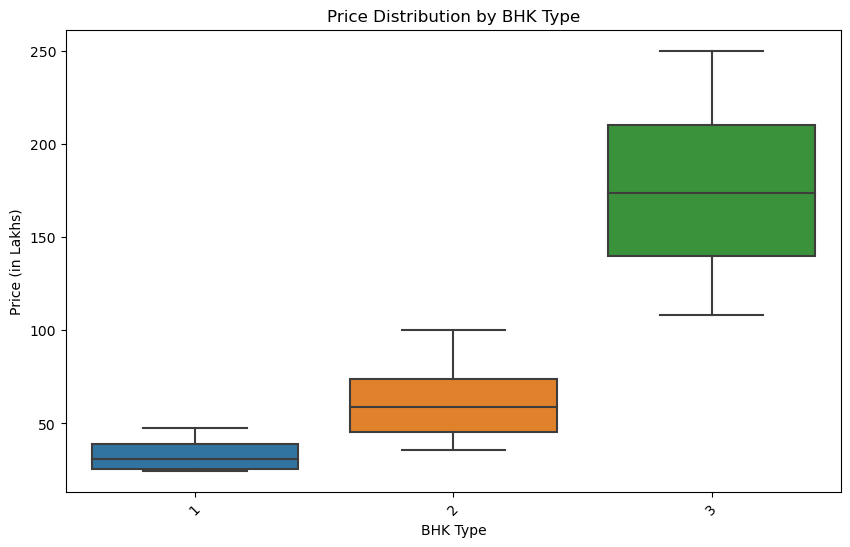

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BHK Type', y='Price in Lakhs')
plt.title('Price Distribution by BHK Type')
plt.xticks(rotation=45)
plt.xlabel('BHK Type')
plt.ylabel('Price (in Lakhs)')
plt.show()

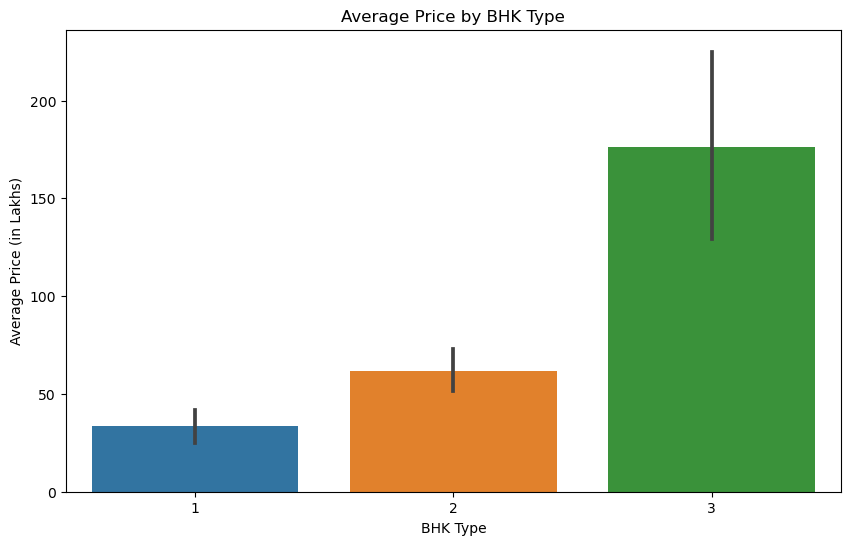

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='BHK Type', y='Price in Lakhs', estimator=np.mean)
plt.title('Average Price by BHK Type')
plt.xticks(rotation=0)
plt.xlabel('BHK Type')
plt.ylabel('Average Price (in Lakhs)')
plt.show()

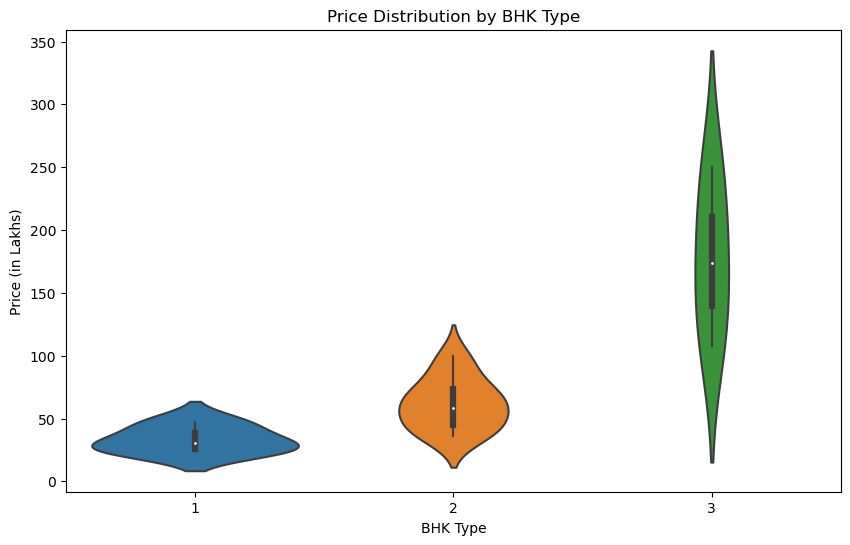

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='BHK Type', y='Price in Lakhs')
plt.title('Price Distribution by BHK Type')
plt.xticks(rotation=0)
plt.xlabel('BHK Type')
plt.ylabel('Price (in Lakhs)')
plt.show()

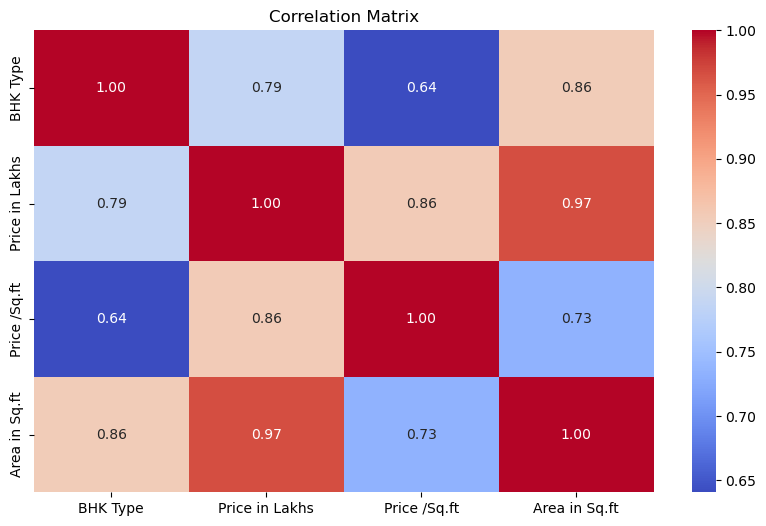

In [55]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

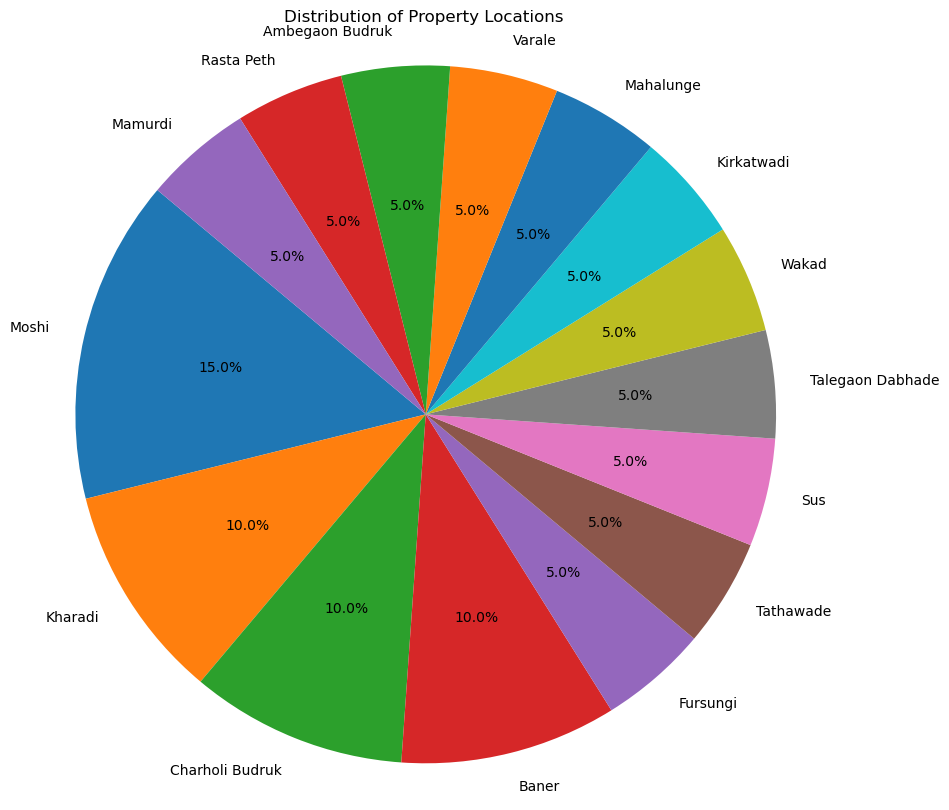

In [56]:
# Count the occurrences of each location
location_counts = df['Location'].value_counts()
# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property Locations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

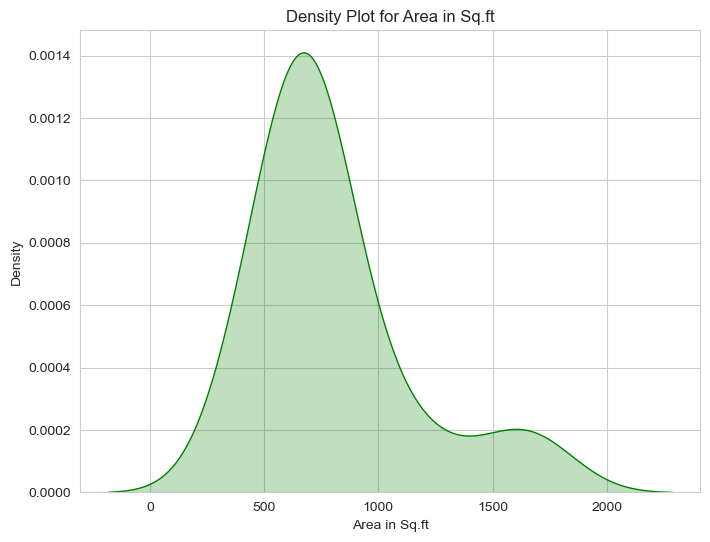

In [57]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['Area in Sq.ft'], shade=True, color="green")
plt.title("Density Plot for Area in Sq.ft")
plt.xlabel("Area in Sq.ft")
plt.ylabel("Density")
plt.show()

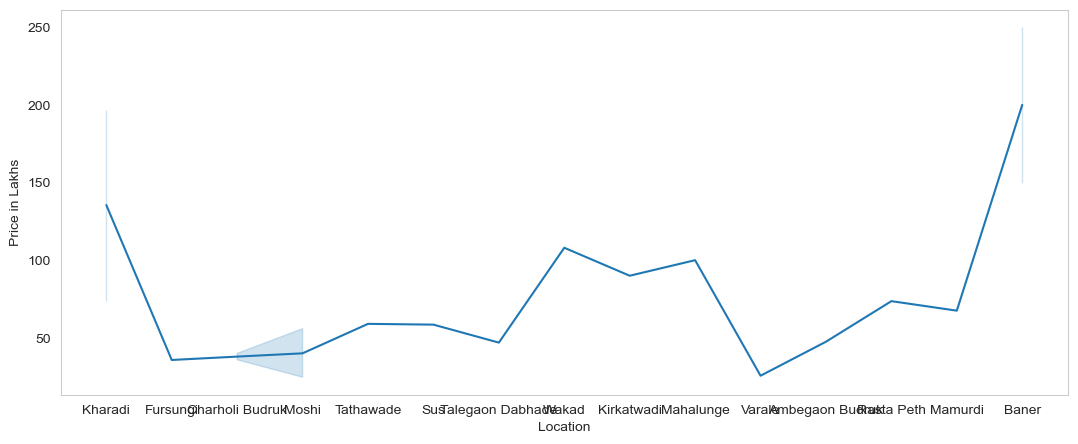

In [58]:
fig = plt.subplots(figsize=(13,5))
sns.lineplot(x='Location', y='Price in Lakhs', data=df)
plt.grid()

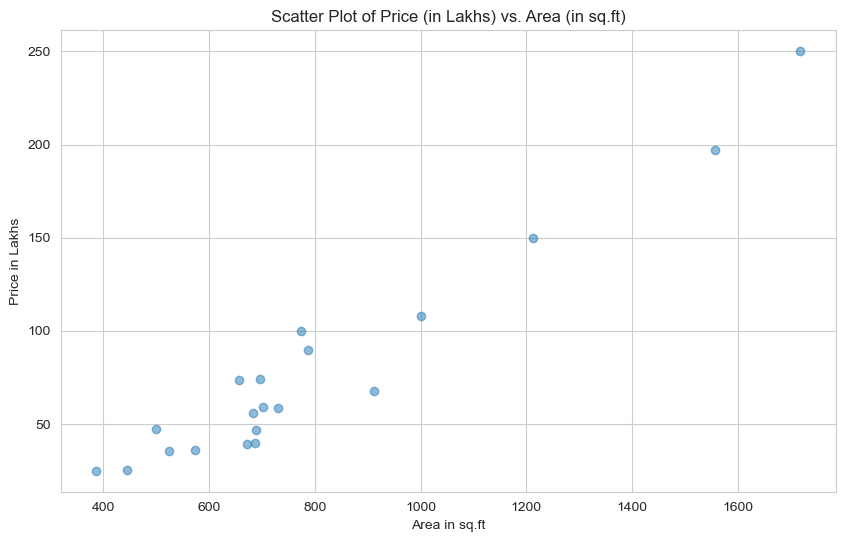

In [59]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Area in Sq.ft'], df['Price in Lakhs'], alpha=0.5)
plt.title('Scatter Plot of Price (in Lakhs) vs. Area (in sq.ft)')
plt.xlabel('Area in sq.ft')
plt.ylabel('Price in Lakhs')

# Display the scatter plot
plt.show()

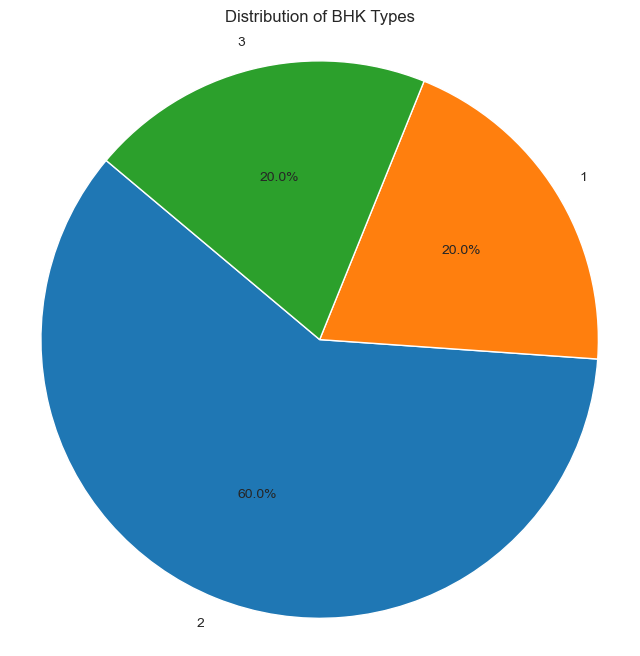

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
# Count the occurrences of each BHK type
bhk_type_counts = df['BHK Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(bhk_type_counts, labels=bhk_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of BHK Types')
plt.axis('equal')

# Display the pie chart
plt.show()

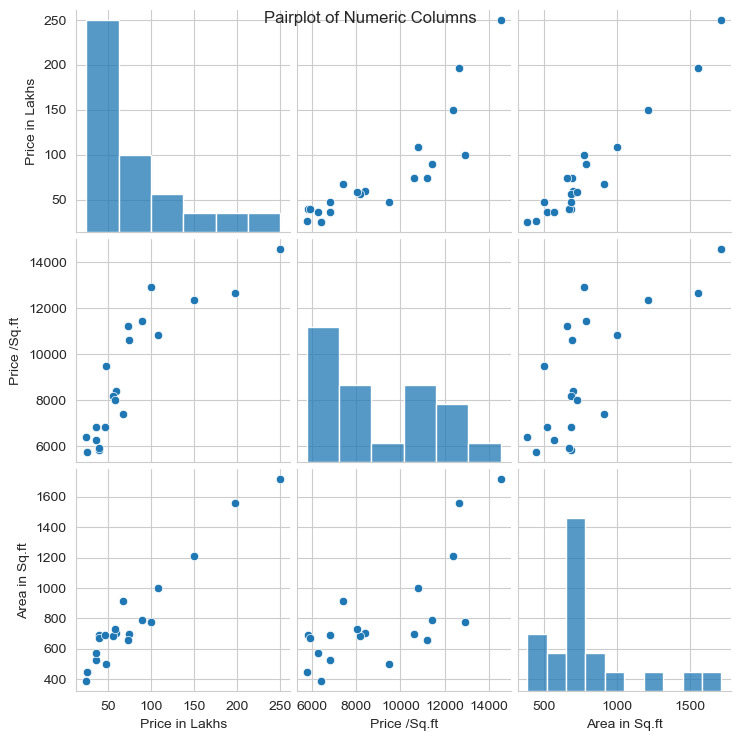

In [61]:
import seaborn as sns

# Select numeric columns for pairplot
numeric_columns = df[['Price in Lakhs', 'Price /Sq.ft', 'Area in Sq.ft']]

# Create a pairplot
sns.pairplot(numeric_columns)
plt.suptitle('Pairplot of Numeric Columns')
plt.show()

# Conclusion

The dataset represents a diverse range of properties in terms of price, location, and BHK type.

Property prices are influenced by various factors, including the size of the property (area in sq.ft) and BHK type.

The majority of properties in the dataset are currently under construction, suggesting a focus on the development of new properties.

The distribution of possession dates for under-construction properties indicates that some will be available in the near future, while others will take longer to complete.

Location plays a significant role in the property market, with various areas having different property counts.

It is essential for potential buyers to consider the BHK type and location when making purchasing decisions, as these factors significantly impact property prices.

The dataset provides valuable insights for both buyers and property developers to make informed decisions in the Pune real estate market.

Further analysis and modeling can be conducted to predict property prices or assess the impact of other features on pricing.

# Thank You!